<a href="https://colab.research.google.com/github/anezovic1/credit-score-classification/blob/main/neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mašinsko učenje 2023/24

## Projektni zadatak - Individualni zadatak

# Zadatak 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import layers
from keras import models
from keras.utils import to_categorical
import keras

from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import cohen_kappa_score

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/MU Projekat/NeuralNetworks/cleaned_anida.csv')

# Proces izrade zadatka

* Priprema podataka
* Izbor modela
* Treniranje modela
* Validacija modela
* Optimizacija hiperparametara
* Testiranje modela

## Priprema podataka

U ovoj fazi se radi dodatna analiza dobijenog skupa podataka. Kako su u prethodnom projektnom zadatku sve vrijednosti pretvorene u numeričke vrijednosti, dodatna modifikacija nije potrebna. Međutim, da bi se poboljšala numerička stabilnost prilikom učenja neuronskih mreža, urađena je normalizacija nekih kolona.



In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
data['Amount_invested_monthly'] = mm.fit_transform(data['Amount_invested_monthly'].values.reshape(-1,1))
data['Annual_Income'] = mm.fit_transform(data['Annual_Income'].values.reshape(-1,1))
data['Monthly_Inhand_Salary'] = mm.fit_transform(data['Monthly_Inhand_Salary'].values.reshape(-1,1))
data['Outstanding_Debt'] = mm.fit_transform(data['Outstanding_Debt'].values.reshape(-1,1))
data['Credit_Utilization_Ratio'] = mm.fit_transform(data['Credit_Utilization_Ratio'].values.reshape(-1,1))
data['Amount_invested_monthly'] = mm.fit_transform(data['Amount_invested_monthly'].values.reshape(-1,1))
data['Monthly_Balance'] = mm.fit_transform(data['Monthly_Balance'].values.reshape(-1,1))
data['Amount_invested_monthly'] = mm.fit_transform(data['Amount_invested_monthly'].values.reshape(-1,1))

In [ ]:
data.to_csv('/content/drive/MyDrive/MU Projekat/NeuralNetworks/cleaned_novi_anida.csv', index=False)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/MU Projekat/NeuralNetworks/cleaned_novi_anida.csv')

In [ ]:
data['Amount_invested_monthly']

0         0.014889
1         0.014889
2         0.014889
3         0.014889
4         0.021899
            ...   
364781    0.004449
364782    0.046596
364783    0.046596
364784    0.030950
364785    0.030950
Name: Amount_invested_monthly, Length: 364786, dtype: float64

In [ ]:
data.head(10)

,Customer_ID,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Age,Credit_History_Age_Years,Credit_History_Age_Months
0,12320,1,13,0.000501,0.120019,3,4,3,4,1,...,0.221329,0,49.574949,0.014889,4,0.218864,0,23,22,1
1,12320,1,13,0.000501,0.120019,3,4,3,4,2,...,0.221329,0,49.574949,0.014889,4,0.218864,0,23,22,1
2,12320,1,13,0.000501,0.120019,3,4,3,4,3,...,0.221329,0,49.574949,0.014889,4,0.218864,0,23,22,1
3,12320,1,13,0.000501,0.120019,3,4,3,4,4,...,0.221329,0,49.574949,0.014889,4,0.218864,0,23,22,1
4,12320,2,13,0.000501,0.060009,3,4,3,4,1,...,0.456615,0,49.574949,0.021899,3,0.199348,0,23,22,0
5,12320,2,13,0.000501,0.060009,3,4,3,4,2,...,0.456615,0,49.574949,0.021899,3,0.199348,0,23,22,0
6,12320,2,13,0.000501,0.060009,3,4,3,4,3,...,0.456615,0,49.574949,0.021899,3,0.199348,0,23,22,0
7,12320,2,13,0.000501,0.060009,3,4,3,4,4,...,0.456615,0,49.574949,0.021899,3,0.199348,0,23,22,0
8,12320,3,13,0.000501,0.060009,3,4,3,4,1,...,0.303400,0,49.574949,0.015126,2,0.231973,0,23,22,3
9,12320,3,13,0.000501,0.060009,3,4,3,4,2,...,0.303400,0,49.574949,0.015126,2,0.231973,0,23,22,3


In [ ]:
data.dtypes

Customer_ID                    int64
Month                          int64
Occupation                     int64
Annual_Income                float64
Monthly_Inhand_Salary        float64
Num_Bank_Accounts              int64
Num_Credit_Card                int64
Interest_Rate                  int64
Num_of_Loan                    int64
Type_of_Loan                   int64
Delay_from_due_date            int64
Num_of_Delayed_Payment         int64
Changed_Credit_Limit         float64
Num_Credit_Inquiries         float64
Credit_Mix                     int64
Outstanding_Debt             float64
Credit_Utilization_Ratio     float64
Payment_of_Min_Amount          int64
Total_EMI_per_month          float64
Amount_invested_monthly      float64
Payment_Behaviour              int64
Monthly_Balance              float64
Credit_Score                   int64
Age                            int64
Credit_History_Age_Years       int64
Credit_History_Age_Months      int64
dtype: object

## Izgradnja modela


### Podjela podataka

Za podjelu podataka na skup za treniranje, skup za validaciju i skup za testiranje, koristi se **holdout metoda**. Za trening skup se alocira 80% podataka, a za testni skup 20%. Dodatno, u skupu za treniranje izvršena je podjela na dva skupa, 75% podataka za treniranje i 25% podataka za validaciju.



In [ ]:
X = data.drop('Credit_Score', axis=1)
y = data['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

Sljedeći korak jeste konvertovati podatke u određeni tip, tačnije **float32**. Ovo je potrebno uraditi, jer mnoge biblioteke za mašinsko učenje, uključujući TensorFlow koji je i korišten, podrazumijevaju rad s ovim tipom podataka.


In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

X_val = X_val.astype('float32')
y_val = y_val.astype('float32')

U nastavku će se koristiti i metoda unakrsne validacije kao dodatna evaluacija modela.

### Arhitektura mreže

Sloj koji se koristi je **Dense sloj** odnosno potpuno povezani sloj, gdje su svi ulazi spojeni sa svim izlazima prethodnog sloja. Ne uključujući ulazni sloj, mreža se sastoji od sedam gusto povezanih slojeva, gdje je posljednji sloj izlazni sloj.

Funkcija aktivacije koja se koristi je **relu (Rectified Linear Unit)**. Ona je izabrana, jer se najčešće koristi u neuronskim mrežama, posebno u dubokom učenju. Za aktivacijsku funkciju izlaznog sloja, koristi se **softmax**, jer se radi o višeklasnoj klasifikaciji.



### Konfiguracija optimizatora i hiperparametara

Za optimizator je uzet **adam**, kod kojeg je podrazumijevana stopa učenja 0.001.

Funkcija gubitka je **categorical crossentropy** jer se radi o višeklasnoj klasifikaciji.

Metrika koja se koristi u gotovo svim primjenama je **tačnost**, pa je iz tog razloga upravo ona korištena u našem slučaju.

Hiperparametar **batch size** je postavljen na 64 i on nam govori koliko instanci se obradi prije nego što se ažuriraju težine modela.

Broj epoha je 100.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(25,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, to_categorical(y_train), epochs=100, batch_size=64, validation_data=(X_val, to_categorical(y_val)))

Epoch 1/100
3420/3420 [==============================] - 23s 6ms/step - loss: 1.1087 - accuracy: 0.5569 - val_loss: 0.8169 - val_accuracy: 0.6034
Epoch 2/100
3420/3420 [==============================] - 22s 6ms/step - loss: 0.8028 - accuracy: 0.6070 - val_loss: 0.8249 - val_accuracy: 0.6265
Epoch 3/100
3420/3420 [==============================] - 20s 6ms/step - loss: 0.7783 - accuracy: 0.6214 - val_loss: 0.7471 - val_accuracy: 0.6388
Epoch 4/100
3420/3420 [==============================] - 25s 7ms/step - loss: 0.7561 - accuracy: 0.6329 - val_loss: 0.7357 - val_accuracy: 0.6505
Epoch 5/100
3420/3420 [==============================] - 23s 7ms/step - loss: 0.7419 - accuracy: 0.6459 - val_loss: 0.7317 - val_accuracy: 0.6525
Epoch 6/100
3420/3420 [==============================] - 24s 7ms/step - loss: 0.7352 - accuracy: 0.6507 - val_loss: 0.7344 - val_accuracy: 0.6505
Epoch 7/100
3420/3420 [==============================] - 20s 6ms/step - loss: 0.7293 - accuracy: 0.6543 - val_loss: 0.7283 -

Nakon treniranja modela, moguće je vidjeti tačnost na skupu za treniranje u posljednjoj epohi i tačnost modela na skupu za validaciju.


## Evaluacija modela

### Evaluacija na osnovu treniranja modela

Pošto **history** sadrži osnovne informacije o performansama modela tokom treniranja, uz pomoć sljedećeg grafika je moguće vidjeti da li postoji overfitting. Pošto na grafiku nema značajnih razlika u funkciji gubitka, zaključujemo da nema overfittinga.

Također, moguće je kreirati i grafik za praćenje tačnosti modela kroz epohe na trening podacima i podacima za validaciju.


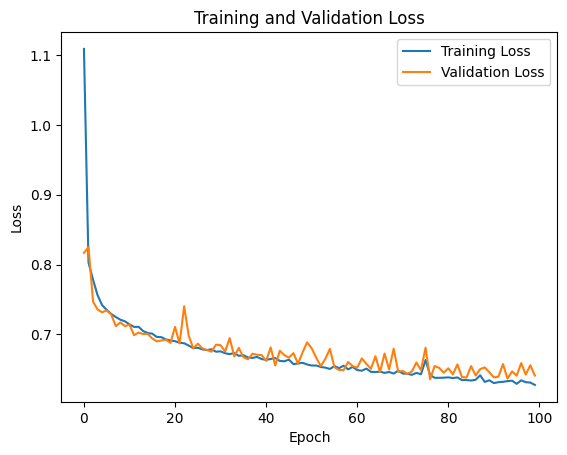

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

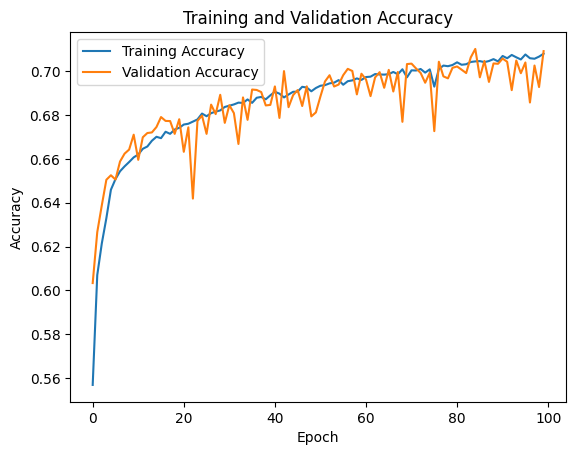

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Testiranje modela

Potrebno je istrenirani model iskoristiti na testnim podacima.

In [ ]:
results = model.evaluate(X_test, to_categorical(y_test))
loss = results[0]
accuracy = results[1]
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

2280/2280 [==============================] - 4s 2ms/step - loss: 0.6317 - accuracy: 0.7104
Test Loss: 0.6317060589790344
Test Accuracy: 0.7103813290596008


### Konfuzijska matrica

Uz pomoć konfuzijske matrice, potrebno je da se provjere različite mjere performansi koje se izvode na osnovu predikcija klasifikatora.

Good - 0 \\
Standard - 1 \\
Poor - 2

2280/2280 [==============================] - 6s 3ms/step


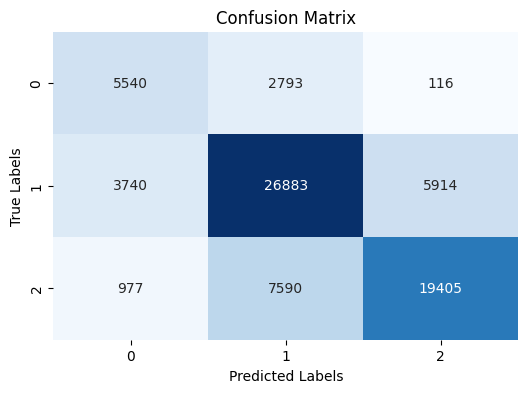

In [ ]:
y_predikcija = model.predict(X_test)

predikcija_labela = np.argmax(y_predikcija, axis=1)

konf_matrica = confusion_matrix(y_test, predikcija_labela)

plt.figure(figsize=(6,4))
sns.heatmap(konf_matrica, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


#### Tačnost

In [ ]:
broj_klasa = konf_matrica.shape[0]

tp = np.sum(np.diag(konf_matrica))
tn = np.sum(konf_matrica) - np.sum(np.diag(konf_matrica))
fp = np.sum(konf_matrica, axis=0) - np.diag(konf_matrica)
fn = np.sum(konf_matrica, axis=1) - np.diag(konf_matrica)

tacnost_modela = (tp + tn) / (tp + tn + fp + fn)
print(f"Ukupna tačnost modela: {tacnost_modela}")


Ukupna tačnost modela: [0.90536583 0.7845368  0.83328194]


#### Stepen greške

In [ ]:
fp = np.sum(konf_matrica, axis=0) - np.diag(konf_matrica)
fn = np.sum(konf_matrica, axis=1) - np.diag(konf_matrica)
stepen_greske = (fp.sum() + fn.sum()) / konf_matrica.sum()

print(f"Stepen greške: {stepen_greske}")

Stepen greške: 0.5792373694454344


#### Specifičnost

In [ ]:
tn = np.sum(np.diag(konf_matrica))
fp = np.sum(konf_matrica, axis=0) - np.diag(konf_matrica)

specifičnost = tn / (tn + fp.sum())
print(f"Specifičnost: {specifičnost}")

Specifičnost: 0.7103813152772828


#### Osjetljivost

In [ ]:
tp = np.sum(np.diag(konf_matrica))
fn = np.sum(konf_matrica, axis=1) - np.diag(konf_matrica)

osjetljivost = tp / (tp + fn.sum())
print(f"Osjetljivost modela: {osjetljivost}")


Osjetljivost modela: 0.7103813152772828


In [ ]:
broj_klasa = konf_matrica.shape[0]
osjetljivosti = []

for i in range(broj_klasa):
    tp = konf_matrica[i, i]
    fn = np.sum(konf_matrica[i, :]) - konf_matrica[i, i]
    osjetljivost_i = tp / (tp + fn)
    osjetljivosti.append(osjetljivost_i)

print("Osjetljivost po klasama:")
for i, sens in enumerate(osjetljivosti):
    print(f"Klasa {i}: {sens}")

Osjetljivost po klasama:
Klasa 0: 0.655698899278021
Klasa 1: 0.7357746941456605
Klasa 2: 0.6937294437294438


#### Preciznost

In [ ]:
tp = np.sum(np.diag(konf_matrica))
fp = np.sum(konf_matrica, axis=0) - np.diag(konf_matrica)

preciznost = tp / (tp + fp.sum())
print(f"Preciznost: {preciznost}")


Preciznost: 0.7103813152772828


#### Kappa statistika

In [ ]:
kappa = cohen_kappa_score(y_test, predikcija_labela)
print(f"Cohen's Kappa: {kappa}")

Cohen's Kappa: 0.512637333122193


### Unakrsna validacija

Ono što nije urađeno prije, a bit će u nastavku jeste dodatno predprocesiranje podataka odnosno primjena standardizacije. Ovim se želi poboljšati performanse modela. Također, umjesto **y** koji predstavlja labelu klase, koristit će se **y_categorical**.

Kao primjer, ako je **y = 1** za neku instancu, to znači da ona pripada klasi **Standard** i bit će **y_categorical = [0 1 0]**.

In [ ]:
le = LabelEncoder()
y_categorical = to_categorical(le.fit_transform(y))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Izabrano je da se za unakrsnu validaciju koristi pet grupa odnosno **k = 5**.

**StratifiedKFold** predstavlja objekat za k-fold unakrsnu validaciju i pri njegovj inicijalizaciji postavljeno je **shuffle=True** što znači da će podaci prije podjele biti izmiješani.

Lista **fold_accuracies** sadrži tačnosti za svaku grupu odnosno fold.

U for petlji se prolazi kroz sve foldove, biraju se indeksi za trening skup i skup validacije. Također, na ista dva skupa se vrši podjela ulaznih i ciljnih podataka.  

Zatim se vrši treniranje modela, gdje je postavljeno **verbose=0** da se informacije o treningu ne bi prikazivale. Ovo je urađeno samo da bi ispis bio čitljiviji.

Na kraju, da bi se tačnost mogla izačunati, vrši se pretvaranje predviđenih i stvarnih vjerovatnoća u klase.



In [ ]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(25,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

fold_accuracies = []

for train_index, val_index in skf.split(X_scaled, y):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y_categorical[train_index], y_categorical[val_index]

    history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_val, y_val), verbose=0)

    y_val_pred = model.predict(X_val)
    y_val_pred_classes = np.argmax(y_val_pred, axis=1)
    y_val_true_classes = np.argmax(y_val, axis=1)
    fold_accuracy = accuracy_score(y_val_true_classes, y_val_pred_classes)
    fold_accuracies.append(fold_accuracy)

prosjecna_tacnost = np.mean(fold_accuracies)
print(f'K-fold unakrsna validacija (k={k_folds}):')
print(f'Prosječna tačnost: {prosjecna_tacnost}')


2280/2280 [==============================] - 4s 2ms/step
K-fold unakrsna validacija (k=5):
Prosječna tačnost: 0.943161291436305


## Utjecaj nebalansiranosti podataka

Za provjeru nebalansiranosti podataka potrebno je prikazati distribuciju podataka unutar skupa.

In [ ]:
print("Originalna distribucija klasa:")
print(np.bincount(y))

Originalna distribucija klasa:
[ 42717 182770 139299]


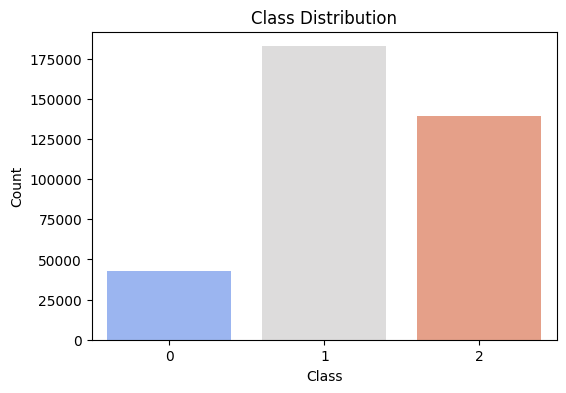

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=y, palette='coolwarm')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Može se primijetiti da je klasa 1 (Standard) najviše zastupljena i da klasa 0 (Good) predstavlja manjinsku klasu u odnosu na klasu 1 i klasu 2. Zbog toga je dobra ideja pokušati popraviti tu nebalansiranost.

### Undersampling

Prvo će se pokušati proces reduciranja broj instanci iz većinske klase.

In [ ]:
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)

X_train_resampled, y_train_resampled = undersample.fit_resample(X_train, y_train)
y_train_resampled = y_train_resampled.astype('float32')
y_train_1D = np.argmax(y_train_resampled, axis=1)
print("Nakon undersamplinga:")
print(np.bincount(y_train_1D))

Nakon undersamplinga:
[34174 34174 34174]


In [ ]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(25,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_undersample = model.fit(X_train_resampled, y_train_resampled, epochs=100, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/100
1602/1602 [==============================] - 14s 8ms/step - loss: 0.6945 - accuracy: 0.6945 - val_loss: 0.7449 - val_accuracy: 0.6613
Epoch 2/100
1602/1602 [==============================] - 13s 8ms/step - loss: 0.6434 - accuracy: 0.7163 - val_loss: 0.7598 - val_accuracy: 0.6662
Epoch 3/100
1602/1602 [==============================] - 10s 6ms/step - loss: 0.6164 - accuracy: 0.7316 - val_loss: 0.6932 - val_accuracy: 0.6702
Epoch 4/100
1602/1602 [==============================] - 11s 7ms/step - loss: 0.5895 - accuracy: 0.7451 - val_loss: 0.6586 - val_accuracy: 0.6911
Epoch 5/100
1602/1602 [==============================] - 12s 7ms/step - loss: 0.5629 - accuracy: 0.7594 - val_loss: 0.6652 - val_accuracy: 0.6853
Epoch 6/100
1602/1602 [==============================] - 13s 8ms/step - loss: 0.5396 - accuracy: 0.7715 - val_loss: 0.6591 - val_accuracy: 0.6951
Epoch 7/100
1602/1602 [==============================] - 9s 6ms/step - loss: 0.5189 - accuracy: 0.7850 - val_loss: 0.6346 - 

In [ ]:
results_undersample = model.evaluate(X_test, to_categorical(y_test))
loss = results_undersample[0]
accuracy = results_undersample[1]
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

2280/2280 [==============================] - 5s 2ms/step - loss: 5875.3276 - accuracy: 0.5060
Test Loss: 5875.32763671875
Test Accuracy: 0.5060308575630188


Kroz 100 epoha, tačnost nad validacijskim podacima je 85%, a tačnost nad trening podacima je 96% što je jako dobar rezultat. Međutim, nad testnim podacima tačnost je 50%. To je očekivano, jer se undersampling radio samo nad trening podacima. Za poboljšanje ovog rezultata, trebalo bi se vratiti na same podatke i izvršiti detaljnija analiza, ali tačnost nad trening i validacijskim podacima je puno bolja nego tačnost prvobitnim treniranjem.


### Oversampling

U ovom dijelu se primjenjuje proces povećanja broja instanci manjinske klase. Za stvaranje sintetičkih podataka koristi se metoda SMOTE.

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

y_train_resampled = y_train_resampled.astype('float32')
y_train_1D = np.argmax(y_train_resampled, axis=1)
print("Nakon undersamplinga:")
print(np.bincount(y_train_1D))

Nakon undersamplinga:
[146216 146216 146216]


In [ ]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(25,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_smote = model.fit(X_train_resampled, y_train_resampled, epochs=25, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/25
6854/6854 [==============================] - 46s 6ms/step - loss: 0.6286 - accuracy: 0.7249 - val_loss: 0.6614 - val_accuracy: 0.6947
Epoch 2/25
6854/6854 [==============================] - 38s 6ms/step - loss: 0.5329 - accuracy: 0.7778 - val_loss: 0.6176 - val_accuracy: 0.7260
Epoch 3/25
6854/6854 [==============================] - 40s 6ms/step - loss: 0.4656 - accuracy: 0.8150 - val_loss: 0.5216 - val_accuracy: 0.7749
Epoch 4/25
6854/6854 [==============================] - 40s 6ms/step - loss: 0.4103 - accuracy: 0.8421 - val_loss: 0.5065 - val_accuracy: 0.7907
Epoch 5/25
6854/6854 [==============================] - 41s 6ms/step - loss: 0.3706 - accuracy: 0.8602 - val_loss: 0.4591 - val_accuracy: 0.8140
Epoch 6/25
6854/6854 [==============================] - 39s 6ms/step - loss: 0.3399 - accuracy: 0.8725 - val_loss: 0.4371 - val_accuracy: 0.8249
Epoch 7/25
6854/6854 [==============================] - 40s 6ms/step - loss: 0.3149 - accuracy: 0.8832 - val_loss: 0.4060 - val_ac

In [ ]:
results_smote = model.evaluate(X_test, to_categorical(y_test))
loss = results_smote[0]
accuracy = results_smote[1]
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

2280/2280 [==============================] - 6s 3ms/step - loss: 7691.8848 - accuracy: 0.1579
Test Loss: 7691.884765625
Test Accuracy: 0.15791277587413788


U ovom slučaju je dobijeno da je tačnost nad trening skupom 94%, a nad validacijskim 90% što je još bolje nego tačnost dobijena undersamplingom. Tačnost nad testnim podacima je također 50%.

## Tuning parametara

Jedan od načina da se poboljšaju performanse modela jeste podešavanje hiperparametara. Optimizacijska strategija koja se koristila je Random Search. Ova metoda je izabrana jer je brža od Grid Search metode.

In [ ]:
pip install scikeras

In [ ]:
def kreiraj_model(hidden_layer_sizes=(256, 128, 64, 32), activation='relu', optimizer='adam'):
    model = keras.models.Sequential()
    model.add(layers.Dense(hidden_layer_sizes[0], activation=activation, input_shape=(25,)))

    for layer_size in hidden_layer_sizes[1:]:
        model.add(layers.Dense(layer_size, activation=activation))

    model.add(layers.Dense(3, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
from scikeras.wrappers import KerasClassifier

y_train_categorical = y_train
y_val_categorical = y_val

model_novi = KerasClassifier(build_fn=kreiraj_model, epochs=20, batch_size=64, verbose=0)

param_dist = {
    'model__hidden_layer_sizes': [(256, 128, 64, 32), (128, 64, 32), (64, 32)],
    'model__activation': ['relu', 'softmax'],
    'model__optimizer': ['adam', 'sgd']
}

# Definisanje RandomizedSearchCV
random_search = RandomizedSearchCV(model_novi, param_distributions=param_dist, n_iter=5, cv=3, verbose=2, random_state=42)

# Sprovođenje RandomizedSearchCV
random_search.fit(X_train, y_train_categorical, validation_data=(X_val, y_val_categorical))

# Ispis rezultata
print("Najbolji parametri:", random_search.best_params_)
print("Najbolji rezultat tačnosti:", random_search.best_score_)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END model__activation=softmax, model__hidden_layer_sizes=(64, 32), model__optimizer=adam; total time= 3.5min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END model__activation=softmax, model__hidden_layer_sizes=(64, 32), model__optimizer=adam; total time= 3.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END model__activation=softmax, model__hidden_layer_sizes=(64, 32), model__optimizer=adam; total time= 3.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END model__activation=softmax, model__hidden_layer_sizes=(128, 64, 32), model__optimizer=sgd; total time= 3.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END model__activation=softmax, model__hidden_layer_sizes=(128, 64, 32), model__optimizer=sgd; total time= 3.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END model__activation=softmax, model__hidden_layer_sizes=(128, 64, 32), model__optimizer=sgd; total time= 3.5min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END model__activation=relu, model__hidden_layer_sizes=(256, 128, 64, 32), model__optimizer=adam; total time= 4.7min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END model__activation=relu, model__hidden_layer_sizes=(256, 128, 64, 32), model__optimizer=adam; total time= 5.5min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END model__activation=relu, model__hidden_layer_sizes=(256, 128, 64, 32), model__optimizer=adam; total time= 4.9min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END model__activation=softmax, model__hidden_layer_sizes=(128, 64, 32), model__optimizer=adam; total time= 3.5min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END model__activation=softmax, model__hidden_layer_sizes=(128, 64, 32), model__optimizer=adam; total time= 3.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END model__activation=softmax, model__hidden_layer_sizes=(128, 64, 32), model__optimizer=adam; total time= 3.3min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END model__activation=relu, model__hidden_layer_sizes=(64, 32), model__optimizer=sgd; total time= 2.6min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END model__activation=relu, model__hidden_layer_sizes=(64, 32), model__optimizer=sgd; total time= 3.4min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


[CV] END model__activation=relu, model__hidden_layer_sizes=(64, 32), model__optimizer=sgd; total time= 2.5min


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Najbolji parametri: {'model__optimizer': 'adam', 'model__hidden_layer_sizes': (64, 32), 'model__activation': 'softmax'}
Najbolji rezultat tačnosti: 0.6811660456976871


Nakon izvršavanja RandomizedSearchCV funkcije, tačnost je 68% što je blisko prvobitnoj tačnosti oko 71%. Ono što je zanimljivo, jesu izabrane vrijednosti hiperparametara. Izabrana je arhitektura sa dva skrivena sloja od 64 i 32 neurona respektivno, a za optimizator je izabran SGD.

NAPOMENA: Vjerovatno se neki rezultati ne poklapaju sa opisanim. Razlog jeste taj što se kod u colabu nekoliko puta pokretao, pa bi bilo jako teško prilikom svakog novog rješenja da se tekst ispravlja.